# Data Wrangling project - Prathmesh Singh CHOUHAN, Siddharth TAURANI and Maharshi PATEL

## Setup

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Jupyter
%matplotlib inline
sns.set_theme(style="whitegrid")

# Display options
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

## Part I: Data Cleaning & Prep

### LOAD DATA & INITIAL INSPECTION

In [28]:
# Change path if needed
df = pd.read_csv("vgsales.csv")

print("Initial shape:", df.shape)
print("\nColumns:")
print(df.columns)

print("\nInfo:")
print(df.info())

print("\nFirst 5 rows:")
display(df.head())

# Check missing values
print("\nMissing values per column:")
print(df.isna().sum())

Initial shape: (16598, 11)

Columns:
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None

First 5 rows:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



Missing values per column:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


### 1.1 HANDLE MISSING VALUES & DATA TYPES

In [29]:
df_clean = df.copy()
df_clean["Year"] = df_clean["Year"].astype("Int64")

print("\nAfter converting Year dtype:")
print(df_clean["Year"].dtype)


After converting Year dtype:
Int64


In [30]:
sales_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
df_clean["Total_Regional_Sales"] = df_clean[sales_cols[:-1]].sum(axis=1)
zero_sales = (df_clean["Global_Sales"] == 0) & (df_clean["Total_Regional_Sales"] == 0)
print("\nRows with zero global + zero regional sales:", zero_sales.sum())


Rows with zero global + zero regional sales: 0


### CHECK & REMOVE DUPLICATES

In [31]:
dup_count = df_clean.duplicated().sum()
print("\nNumber of fully duplicated rows:", dup_count)

df_clean = df_clean.drop_duplicates()
print("Shape after dropping duplicates:", df_clean.shape)


Number of fully duplicated rows: 0
Shape after dropping duplicates: (16598, 12)


### 1.3 "BEFORE / AFTER" SUMMARY FOR EVALUATION GRID

In [32]:
print("\n=== BEFORE CLEANING ===")
print("Shape:", df.shape)
print("Missing values:\n", df.isna().sum())

print("\n=== AFTER CLEANING ===")
print("Shape:", df_clean.shape)
print("Missing values:\n", df_clean.isna().sum())


=== BEFORE CLEANING ===
Shape: (16598, 11)
Missing values:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

=== AFTER CLEANING ===
Shape: (16598, 12)
Missing values:
 Rank                      0
Name                      0
Platform                  0
Year                    271
Genre                     0
Publisher                58
NA_Sales                  0
EU_Sales                  0
JP_Sales                  0
Other_Sales               0
Global_Sales              0
Total_Regional_Sales      0
dtype: int64


In [33]:
print("\n=== BEFORE CLEANING ===")
print("Shape:", df.shape)
print("Missing values:\n", df.isna().sum())

print("\n=== AFTER CLEANING ===")
print("Shape:", df_clean.shape)
print("Missing values:\n", df_clean.isna().sum())


=== BEFORE CLEANING ===
Shape: (16598, 11)
Missing values:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

=== AFTER CLEANING ===
Shape: (16598, 12)
Missing values:
 Rank                      0
Name                      0
Platform                  0
Year                    271
Genre                     0
Publisher                58
NA_Sales                  0
EU_Sales                  0
JP_Sales                  0
Other_Sales               0
Global_Sales              0
Total_Regional_Sales      0
dtype: int64


## Part II: EDA

### 2.1 DESCRIPTIVE STATISTICS

In [34]:
print("\n=== DESCRIPTIVE STATISTICS (Numerical Columns) ===")
display(df_clean[sales_cols].describe())

top10_games = df_clean.sort_values("Global_Sales", ascending=False).head(10)
print("\n=== Top 10 Best-Selling Games Globally ===")
display(top10_games[["Rank", "Name", "Platform", "Year", "Genre", "Publisher", "Global_Sales"]])


=== DESCRIPTIVE STATISTICS (Numerical Columns) ===


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000



=== Top 10 Best-Selling Games Globally ===


,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,28.31


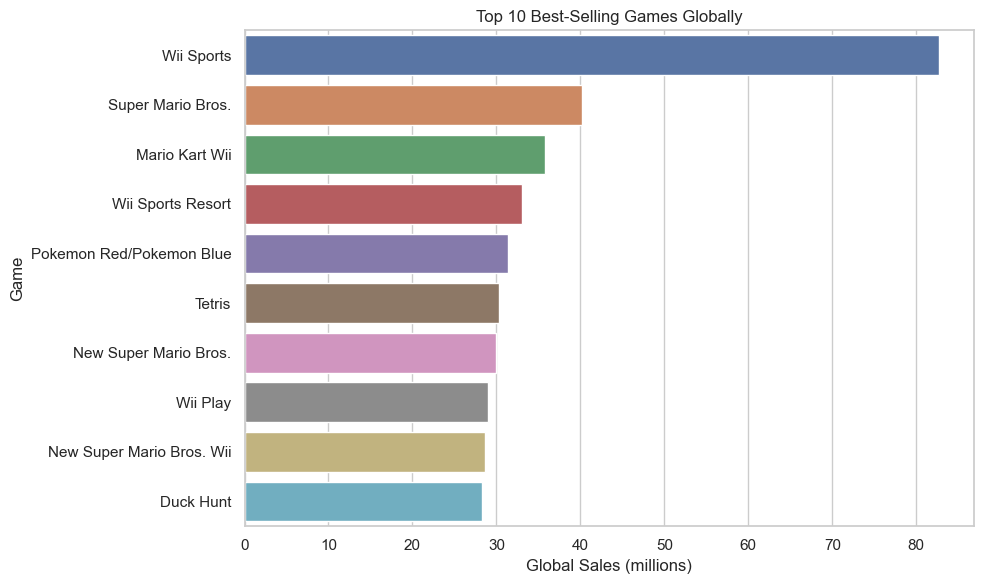

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_games,
    x="Global_Sales",
    y="Name"
)
plt.title("Top 10 Best-Selling Games Globally")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Game")
plt.tight_layout()
plt.show()

### 2.2 TRENDS OVER TIME

In [36]:
df_year = df_clean.dropna(subset=["Year"]).copy()
df_year["Year"] = df_year["Year"].astype(int)

c:\Users\Siddharth\anaconda\envs\Aivancity\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Siddharth\anaconda\envs\Aivancity\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


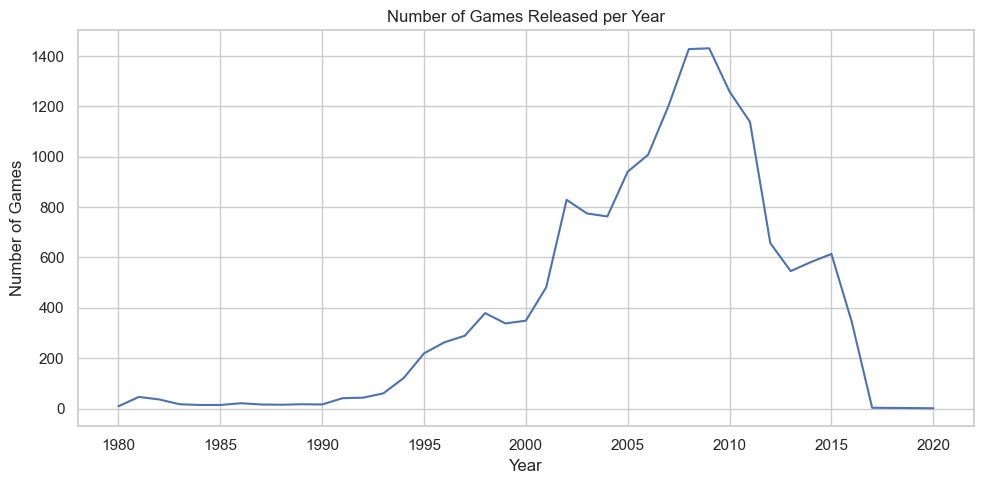

In [37]:
games_per_year = df_year.groupby("Year")["Name"].count().reset_index(name="Num_Games")

plt.figure(figsize=(10, 5))
sns.lineplot(data=games_per_year, x="Year", y="Num_Games")
plt.title("Number of Games Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.tight_layout()
plt.show()

c:\Users\Siddharth\anaconda\envs\Aivancity\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Siddharth\anaconda\envs\Aivancity\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


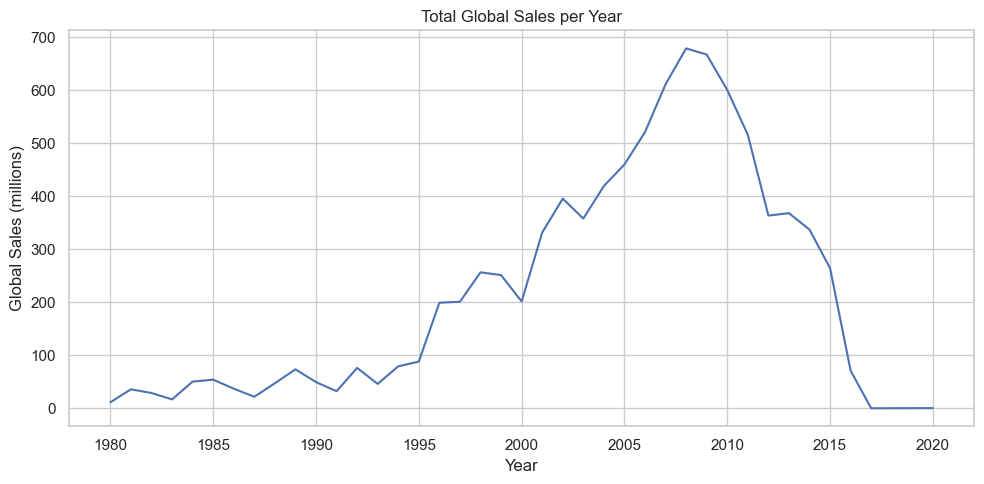

In [38]:
sales_per_year = df_year.groupby("Year")["Global_Sales"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_per_year, x="Year", y="Global_Sales")
plt.title("Total Global Sales per Year")
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

### 2.3 GENRE ANALYSIS

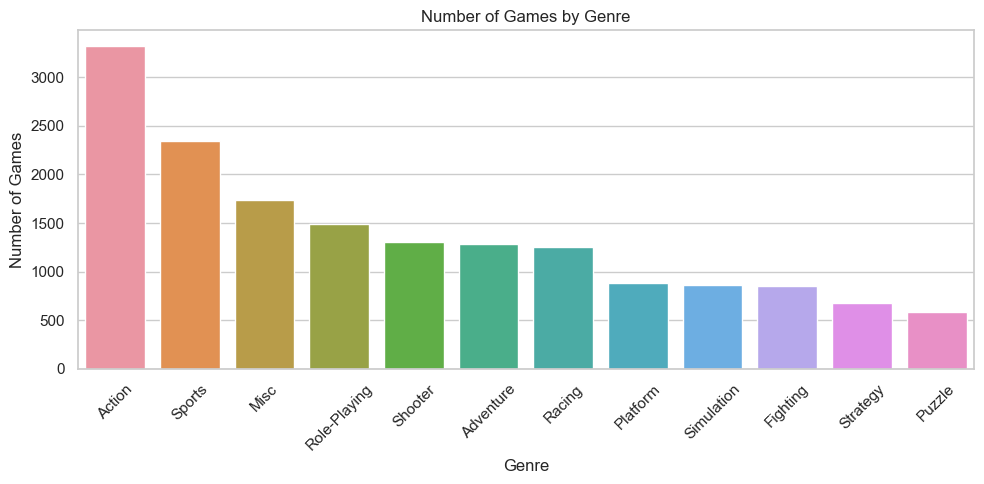

In [39]:
genre_counts = df_clean["Genre"].value_counts().reset_index()
genre_counts.columns = ["Genre", "Num_Games"]

plt.figure(figsize=(10, 5))
sns.barplot(data=genre_counts, x="Genre", y="Num_Games")
plt.title("Number of Games by Genre")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.tight_layout()
plt.show()

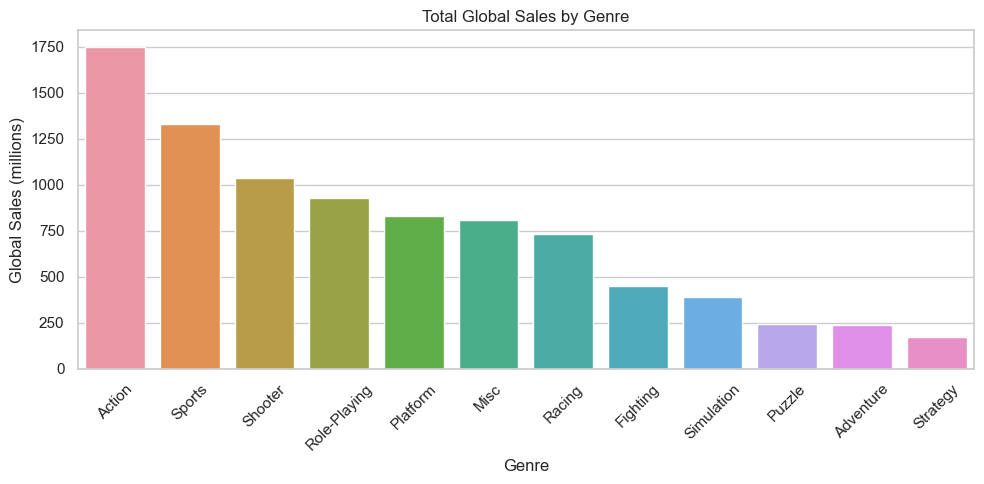

In [40]:
genre_sales = df_clean.groupby("Genre")["Global_Sales"].sum().reset_index().sort_values("Global_Sales", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=genre_sales, x="Genre", y="Global_Sales")
plt.title("Total Global Sales by Genre")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

In [41]:
print("\n=== Genre Counts ===")
display(genre_counts)

print("\n=== Genre Global Sales ===")
display(genre_sales)


=== Genre Counts ===


,Genre,Num_Games
0,Action,3316
1,Sports,2346
2,Misc,1739
3,Role-Playing,1488
4,Shooter,1310
5,Adventure,1286
6,Racing,1249
7,Platform,886
8,Simulation,867
9,Fighting,848



=== Genre Global Sales ===


,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


### 2.4 PLATFORM ANALYSIS

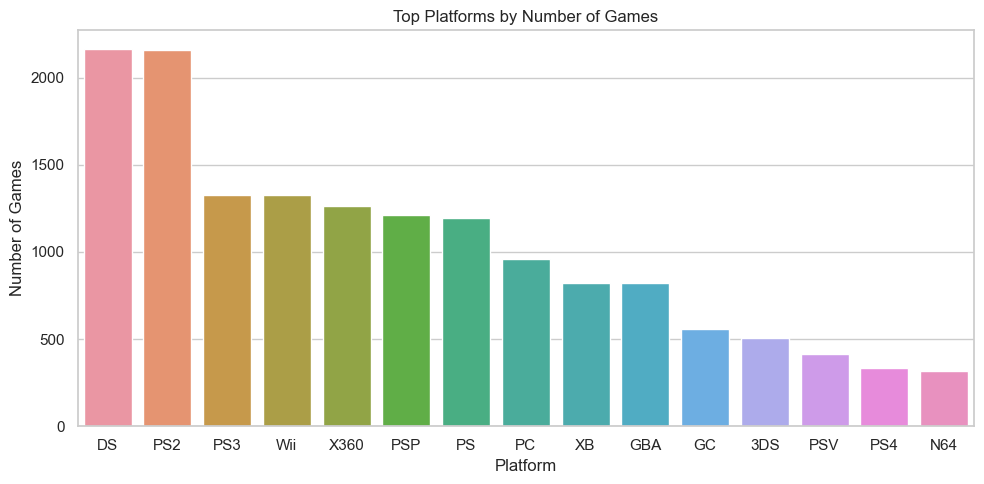

In [42]:
platform_counts = df_clean["Platform"].value_counts().reset_index()
platform_counts.columns = ["Platform", "Num_Games"]

plt.figure(figsize=(10, 5))
sns.barplot(data=platform_counts.head(15), x="Platform", y="Num_Games")
plt.title("Top Platforms by Number of Games")
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.tight_layout()
plt.show()

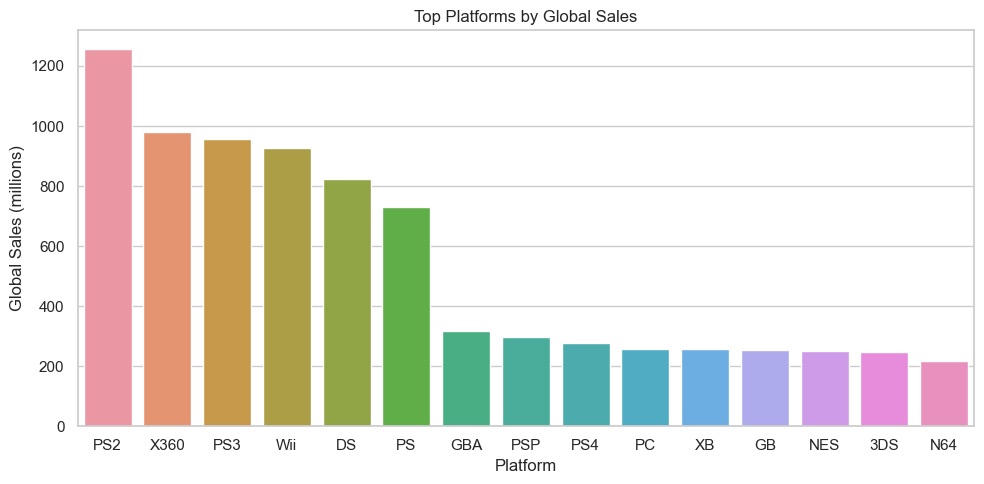

In [43]:
platform_sales = df_clean.groupby("Platform")["Global_Sales"].sum().reset_index().sort_values("Global_Sales", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=platform_sales.head(15), x="Platform", y="Global_Sales")
plt.title("Top Platforms by Global Sales")
plt.xlabel("Platform")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

In [44]:
print("\n=== Platform Counts ===")
display(platform_counts.head(15))

print("\n=== Platform Global Sales ===")
display(platform_sales.head(15))


=== Platform Counts ===


,Platform,Num_Games
0,DS,2163
1,PS2,2161
2,PS3,1329
3,Wii,1325
4,X360,1265
5,PSP,1213
6,PS,1196
7,PC,960
8,XB,824
9,GBA,822



=== Platform Global Sales ===


,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


c:\Users\Siddharth\anaconda\envs\Aivancity\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Siddharth\anaconda\envs\Aivancity\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


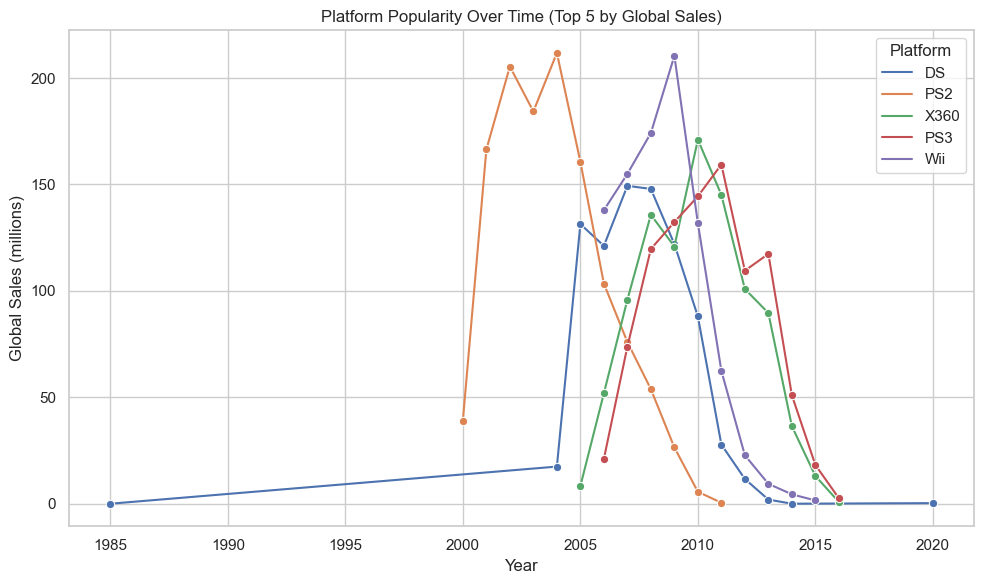

In [45]:
top_platforms = platform_sales.head(5)["Platform"]
df_top_plat = df_year[df_year["Platform"].isin(top_platforms)]

year_platform_sales = (
    df_top_plat
    .groupby(["Year", "Platform"])["Global_Sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.lineplot(data=year_platform_sales, x="Year", y="Global_Sales", hue="Platform", marker="o")
plt.title("Platform Popularity Over Time (Top 5 by Global Sales)")
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

### 2.5 REGIONAL ANALYSIS


=== Total Sales by Region (millions) ===
NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64


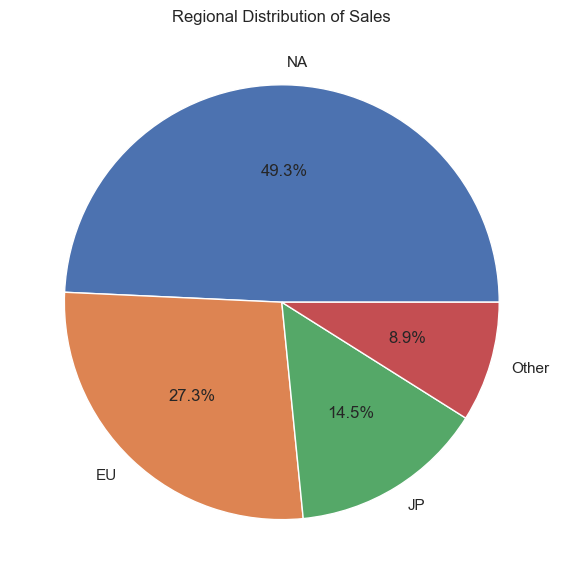

In [46]:
region_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

region_totals = df_clean[region_cols].sum()
print("\n=== Total Sales by Region (millions) ===")
print(region_totals)

plt.figure(figsize=(6, 6))
plt.pie(region_totals.values, labels=["NA", "EU", "JP", "Other"], autopct="%1.1f%%")
plt.title("Regional Distribution of Sales")
plt.tight_layout()
plt.show()

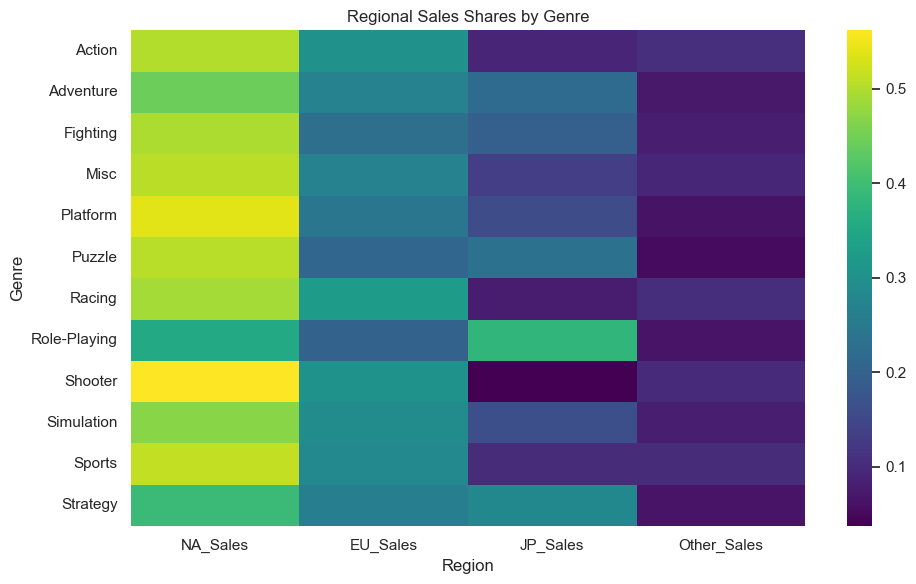

In [47]:
genre_region_sales = df_clean.groupby("Genre")[region_cols].sum()

genre_region_shares = genre_region_sales.div(genre_region_sales.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
sns.heatmap(genre_region_shares, annot=False, cmap="viridis")
plt.title("Regional Sales Shares by Genre")
plt.xlabel("Region")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [48]:
print("\n=== Genre x Region Sales (absolute) ===")
display(genre_region_sales.head())

print("\n=== Genre x Region Sales Shares ===")
display(genre_region_shares.head())


=== Genre x Region Sales (absolute) ===


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.83,525.00,159.95,187.38
Adventure,105.80,64.13,52.07,16.81
Fighting,223.59,101.32,87.35,36.68
Misc,410.24,215.98,107.76,75.32
Platform,447.05,201.63,130.77,51.59



=== Genre x Region Sales Shares ===


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.501571,0.299973,0.091392,0.107064
Adventure,0.443030,0.268540,0.218039,0.070391
Fighting,0.498040,0.225687,0.194569,0.081704
Misc,0.506907,0.266873,0.133152,0.093068
Platform,0.537940,0.242624,0.157357,0.062079


### 2.6 PUBLISHER INSIGHTS

In [49]:
publisher_sales = (
    df_clean
    .groupby("Publisher")["Global_Sales"]
    .sum()
    .reset_index()
    .sort_values("Global_Sales", ascending=False)
)

top10_publishers = publisher_sales.head(10)
print("\n=== Top 10 Publishers by Global Sales ===")
display(top10_publishers)


=== Top 10 Publishers by Global Sales ===


,Publisher,Global_Sales
359,Nintendo,1786.56
138,Electronic Arts,1110.32
21,Activision,727.46
456,Sony Computer Entertainment,607.50
525,Ubisoft,474.72
494,Take-Two Interactive,399.54
488,THQ,340.77
275,Konami Digital Entertainment,283.64
446,Sega,272.99
347,Namco Bandai Games,254.09


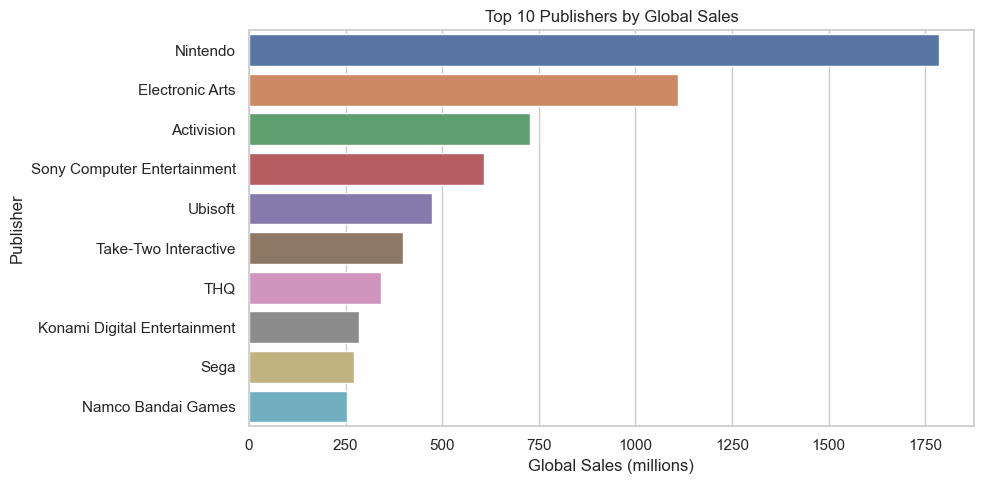

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top10_publishers, x="Global_Sales", y="Publisher")
plt.title("Top 10 Publishers by Global Sales")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()

### 2.7 MARKET DOMINANCE ANALYSIS

In [51]:
pub_genre_sales = (
    df_clean
    .groupby(["Genre", "Publisher"])["Global_Sales"]
    .sum()
    .reset_index()
)

In [52]:
genre_totals = pub_genre_sales.groupby("Genre")["Global_Sales"].sum().reset_index()
genre_totals.rename(columns={"Global_Sales": "Genre_Total_Sales"}, inplace=True)

pub_genre_sales = pub_genre_sales.merge(genre_totals, on="Genre", how="left")
pub_genre_sales["Market_Share_Genre"] = pub_genre_sales["Global_Sales"] / pub_genre_sales["Genre_Total_Sales"]

In [53]:
pub_genre_sales["Is_Genre_Leader"] = pub_genre_sales["Market_Share_Genre"] > 0.30

print("\n=== Example Publisher-Genre Market Shares ===")
display(pub_genre_sales.head())


=== Example Publisher-Genre Market Shares ===


,Genre,Publisher,Global_Sales,Genre_Total_Sales,Market_Share_Genre,Is_Genre_Leader
0,Action,20th Century Fox Video Games,1.72,1750.33,0.000983,False
1,Action,3DO,6.28,1750.33,0.003588,False
2,Action,505 Games,3.22,1750.33,0.001840,False
3,Action,5pb,0.13,1750.33,0.000074,False
4,Action,989 Studios,2.63,1750.33,0.001503,False


In [54]:
genre_diversity = (
    df_clean
    .groupby("Publisher")["Genre"]
    .nunique()
    .reset_index()
    .rename(columns={"Genre": "Genre_Diversity"})
)

In [55]:
publisher_region_sales = (
    df_clean
    .groupby("Publisher")[region_cols]
    .sum()
    .reset_index()
)

publisher_region_sales["Total_Regional"] = publisher_region_sales[region_cols].sum(axis=1)

for col in region_cols:
    publisher_region_sales[col + "_prop"] = (
        publisher_region_sales[col] / publisher_region_sales["Total_Regional"]
    )

prop_cols = [c for c in publisher_region_sales.columns if c.endswith("_prop")]

publisher_region_sales["Regional_Consistency_Std"] = publisher_region_sales[prop_cols].std(axis=1)

regional_consistency = publisher_region_sales[["Publisher", "Regional_Consistency_Std"]]

In [56]:
genre_medians = df_clean.groupby("Genre")["Global_Sales"].median().reset_index()
genre_medians.rename(columns={"Global_Sales": "Genre_Median_Sales"}, inplace=True)

df_hits = df_clean.merge(genre_medians, on="Genre", how="left")
df_hits["Is_Hit"] = df_hits["Global_Sales"] > df_hits["Genre_Median_Sales"]

hit_rate = (
    df_hits
    .groupby("Publisher")["Is_Hit"]
    .mean()
    .reset_index()
    .rename(columns={"Is_Hit": "Hit_Rate"})
)

In [57]:
leader_counts = (
    pub_genre_sales[pub_genre_sales["Is_Genre_Leader"]]
    .groupby("Publisher")["Genre"]
    .nunique()
    .reset_index()
    .rename(columns={"Genre": "Num_Genres_Leader"})
)

In [58]:
publisher_metrics = (
    publisher_sales.merge(genre_diversity, on="Publisher", how="left")
    .merge(regional_consistency, on="Publisher", how="left")
    .merge(hit_rate, on="Publisher", how="left")
    .merge(leader_counts, on="Publisher", how="left")
)

publisher_metrics["Num_Genres_Leader"] = publisher_metrics["Num_Genres_Leader"].fillna(0)

In [59]:
def min_max_norm(series):
    return (series - series.min()) / (series.max() - series.min())

publisher_metrics["Norm_Hit_Rate"] = min_max_norm(publisher_metrics["Hit_Rate"].fillna(0))
publisher_metrics["Norm_Genre_Diversity"] = min_max_norm(publisher_metrics["Genre_Diversity"].fillna(0))

In [60]:
publisher_metrics["Norm_Consistency"] = 1 - min_max_norm(publisher_metrics["Regional_Consistency_Std"].fillna(0))

publisher_metrics["Norm_Leader_Count"] = min_max_norm(publisher_metrics["Num_Genres_Leader"])

In [61]:
publisher_metrics["Market_Power_Index"] = (
    0.35 * publisher_metrics["Norm_Hit_Rate"] +
    0.30 * publisher_metrics["Norm_Genre_Diversity"] +
    0.25 * publisher_metrics["Norm_Consistency"] +
    0.10 * publisher_metrics["Norm_Leader_Count"]
)


=== Top 15 Publishers by Market Power Index ===


,Publisher,Global_Sales,Genre_Diversity,Hit_Rate,Regional_Consistency_Std,Num_Genres_Leader,Market_Power_Index
0,Nintendo,1786.56,12,0.852063,0.165225,3.0,0.908607
1,Electronic Arts,1110.32,12,0.740192,0.233091,1.0,0.760137
3,Sony Computer Entertainment,607.50,12,0.683748,0.151116,0.0,0.758564
26,Virgin Interactive,43.87,12,0.580645,0.153013,0.0,0.721286
8,Sega,272.99,12,0.532081,0.132444,0.0,0.717215
7,Konami Digital Entertainment,283.64,12,0.431490,0.102189,0.0,0.701022
11,Capcom,200.89,12,0.498688,0.143714,0.0,0.698444
14,Square Enix,145.18,9,0.665236,0.115980,0.0,0.692347
5,Take-Two Interactive,399.54,12,0.619855,0.231647,0.0,0.685593
10,Microsoft Game Studios,245.79,12,0.677249,0.278876,0.0,0.676000


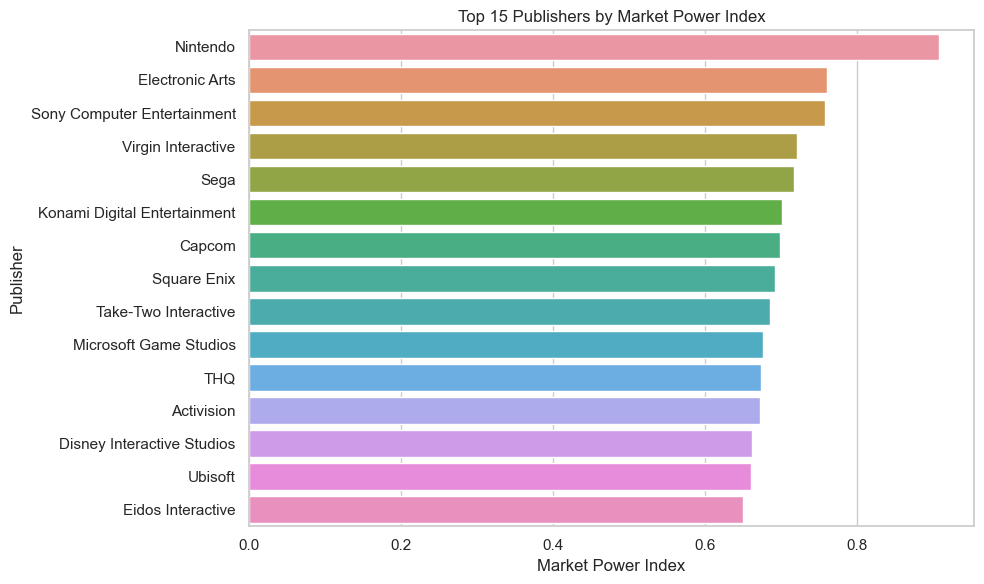

In [62]:
publisher_ranked = publisher_metrics.sort_values("Market_Power_Index", ascending=False)

print("\n=== Top 15 Publishers by Market Power Index ===")
display(publisher_ranked.head(15)[
    ["Publisher", "Global_Sales", "Genre_Diversity", "Hit_Rate",
     "Regional_Consistency_Std", "Num_Genres_Leader", "Market_Power_Index"]
])

plt.figure(figsize=(10, 6))
sns.barplot(
    data=publisher_ranked.head(15),
    x="Market_Power_Index",
    y="Publisher"
)
plt.title("Top 15 Publishers by Market Power Index")
plt.xlabel("Market Power Index")
plt.ylabel("Publisher")
plt.tight_layout()
plt.show()

In [63]:
def classify_publisher(row):
    if row["Genre_Diversity"] >= publisher_metrics["Genre_Diversity"].quantile(0.75) and row["Hit_Rate"] >= publisher_metrics["Hit_Rate"].quantile(0.75):
        return "Diversified Giant"
    elif row["Num_Genres_Leader"] >= 2:
        return "Multi-Genre Leader"
    elif row["Genre_Diversity"] <= publisher_metrics["Genre_Diversity"].quantile(0.25) and row["Hit_Rate"] >= publisher_metrics["Hit_Rate"].quantile(0.75):
        return "Genre Specialist"
    else:
        return "Balanced / Niche Publisher"

publisher_ranked["Archetype"] = publisher_ranked.apply(classify_publisher, axis=1)

print("\n=== Example Publisher Archetypes ===")
display(publisher_ranked.head(20)[
    ["Publisher", "Market_Power_Index", "Archetype", "Genre_Diversity", "Hit_Rate", "Num_Genres_Leader"]
])



=== Example Publisher Archetypes ===


,Publisher,Market_Power_Index,Archetype,Genre_Diversity,Hit_Rate,Num_Genres_Leader
0,Nintendo,0.908607,Diversified Giant,12,0.852063,3.0
1,Electronic Arts,0.760137,Diversified Giant,12,0.740192,1.0
3,Sony Computer Entertainment,0.758564,Diversified Giant,12,0.683748,0.0
26,Virgin Interactive,0.721286,Diversified Giant,12,0.580645,0.0
8,Sega,0.717215,Diversified Giant,12,0.532081,0.0
7,Konami Digital Entertainment,0.701022,Balanced / Niche Publisher,12,0.431490,0.0
11,Capcom,0.698444,Balanced / Niche Publisher,12,0.498688,0.0
14,Square Enix,0.692347,Diversified Giant,9,0.665236,0.0
5,Take-Two Interactive,0.685593,Diversified Giant,12,0.619855,0.0
10,Microsoft Game Studios,0.676000,Diversified Giant,12,0.677249,0.0


### 2.8 REGIONAL PREFERENCE DIVERGENCE

In [64]:
region_totals_all = df_clean[region_cols].sum()
global_region_props = region_totals_all / region_totals_all.sum()

print("\nGlobal region proportions:")
print(global_region_props)

# Proportions per game
df_reg = df_clean.copy()
df_reg["Total_Regional_Sales"] = df_reg[region_cols].sum(axis=1)

valid_rows = df_reg["Total_Regional_Sales"] > 0
for col in region_cols:
    df_reg[col + "_prop"] = 0.0

df_reg.loc[valid_rows, [c + "_prop" for c in region_cols]] = (
    df_reg.loc[valid_rows, region_cols]
    .div(df_reg.loc[valid_rows, "Total_Regional_Sales"], axis=0)
)

region_prop_cols = [c + "_prop" for c in region_cols]


Global region proportions:
NA_Sales       0.492712
EU_Sales       0.273012
JP_Sales       0.144801
Other_Sales    0.089475
dtype: float64


In [65]:
def regional_divergence(row, global_props):
    diffs = row[region_prop_cols].values - global_props.values
    return np.sqrt(np.sum(diffs ** 2))

df_reg["Regional_Divergence_Score"] = df_reg.apply(
    regional_divergence, axis=1, global_props=global_region_props
)

print("\n=== Games with Highest Regional Divergence ===")
display(
    df_reg.sort_values("Regional_Divergence_Score", ascending=False)
    .head(15)[["Name", "Platform", "Genre", "Publisher", "Regional_Divergence_Score"] + region_prop_cols]
)


=== Games with Highest Regional Divergence ===


,Name,Platform,Genre,Publisher,Regional_Divergence_Score,NA_Sales_prop,EU_Sales_prop,JP_Sales_prop,Other_Sales_prop
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.58845,0.0,0.0,0.0,0.0
0,Wii Sports,Wii,Sports,Nintendo,NaN,NaN,NaN,NaN,NaN
1,Super Mario Bros.,NES,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,Racing,Nintendo,NaN,NaN,NaN,NaN,NaN
3,Wii Sports Resort,Wii,Sports,Nintendo,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,Puzzle,Nintendo,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN
7,Wii Play,Wii,Misc,Nintendo,NaN,NaN,NaN,NaN,NaN
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN


In [66]:
genre_region_totals = df_clean.groupby("Genre")[region_cols].sum()
genre_region_totals["Total"] = genre_region_totals.sum(axis=1)
for col in region_cols:
    genre_region_totals[col + "_share"] = genre_region_totals[col] / genre_region_totals["Total"]

genre_region_affinity = genre_region_totals[[c + "_share" for c in region_cols]].copy()

# Compare to overall regional distribution
for col in region_cols:
    genre_region_affinity[col + "_over_index"] = (
        genre_region_affinity[col + "_share"] / global_region_props[col]
    )

print("\n=== Genre-Region Affinity (shares & over-index) ===")
display(genre_region_affinity.head())


=== Genre-Region Affinity (shares & over-index) ===


,NA_Sales_share,EU_Sales_share,JP_Sales_share,Other_Sales_share,NA_Sales_over_index,EU_Sales_over_index,JP_Sales_over_index,Other_Sales_over_index
Genre,,,,,,,,
Action,0.501571,0.299973,0.091392,0.107064,1.017980,1.098754,0.631155,1.196579
Adventure,0.443030,0.268540,0.218039,0.070391,0.899166,0.983621,1.505792,0.786704
Fighting,0.498040,0.225687,0.194569,0.081704,1.010812,0.826658,1.343706,0.913139
Misc,0.506907,0.266873,0.133152,0.093068,1.028809,0.977514,0.919555,1.040152
Platform,0.537940,0.242624,0.157357,0.062079,1.091794,0.888694,1.086716,0.693808


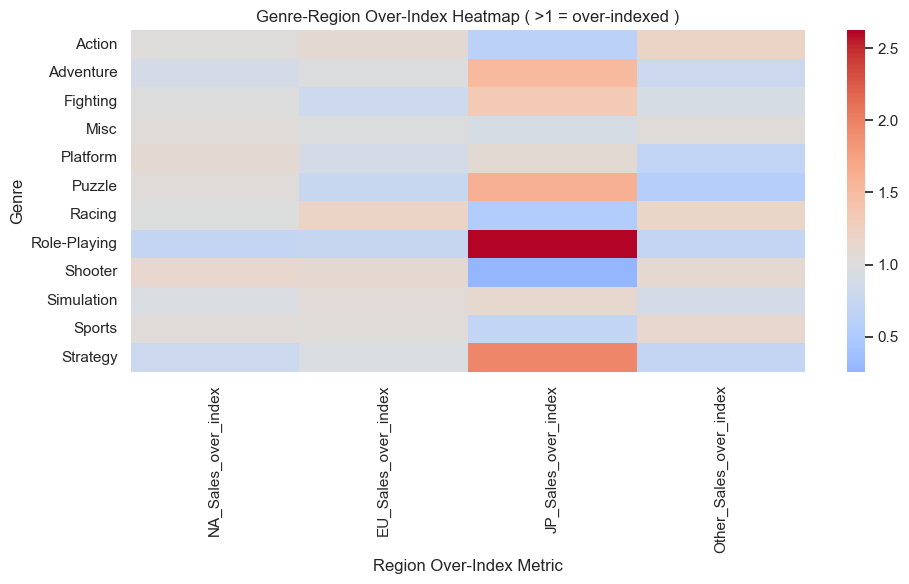

In [67]:
over_index_cols = [c for c in genre_region_affinity.columns if c.endswith("_over_index")]
plt.figure(figsize=(10, 6))
sns.heatmap(genre_region_affinity[over_index_cols], annot=False, cmap="coolwarm", center=1)
plt.title("Genre-Region Over-Index Heatmap ( >1 = over-indexed )")
plt.xlabel("Region Over-Index Metric")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [68]:
df_year_reg = df_year.copy()  

year_genre_region_sales = (
    df_year_reg
    .groupby(["Year", "Genre"])[["NA_Sales", "EU_Sales", "JP_Sales"]]
    .sum()
    .reset_index()
)

melted = year_genre_region_sales.melt(
    id_vars=["Year", "Genre"],
    value_vars=["NA_Sales", "EU_Sales", "JP_Sales"],
    var_name="Region",
    value_name="Sales"
)

melted["Region"] = (
    melted["Region"]
    .str.replace("_Sales", "", regex=False)
    .replace({"NA": "North America", "EU": "Europe", "JP": "Japan"})
)

In [69]:
favorite_genre = (
    melted.sort_values(["Year", "Region", "Sales"], ascending=[True, True, False])
    .groupby(["Year", "Region"])
    .first()
    .reset_index()
    [["Year", "Region", "Genre", "Sales"]]
)

print("\n=== Favorite Genre by Region and Year (sample) ===")
display(favorite_genre.head(15))


=== Favorite Genre by Region and Year (sample) ===


,Year,Region,Genre,Sales
0,1980,Europe,Shooter,0.43
1,1980,Japan,Action,0.00
2,1980,North America,Shooter,6.56
3,1981,Europe,Action,0.81
4,1981,Japan,Action,0.00
5,1981,North America,Action,13.86
6,1982,Europe,Puzzle,0.58
7,1982,Japan,Action,0.00
8,1982,North America,Puzzle,9.35
9,1983,Europe,Platform,0.43


In [70]:
def compute_stability(group):
    group = group.sort_values("Year")
    favs = group["Genre"].tolist()
    if len(favs) < 2:
        return np.nan
    stable_years = sum(1 for i in range(1, len(favs)) if favs[i] == favs[i - 1])
    return stable_years / (len(favs) - 1)

stability = (
    favorite_genre
    .groupby("Region")
    .apply(compute_stability)
    .reset_index(name="Preference_Stability_Index")
)

print("\n=== Preference Stability Index by Region ===")
display(stability)


=== Preference Stability Index by Region ===


,Region,Preference_Stability_Index
0,Europe,0.315789
1,Japan,0.684211
2,North America,0.473684


In [71]:
def is_cultural_outlier(row):
    props = row[region_prop_cols].values
    max_idx = np.argmax(props)
    max_val = props[max_idx]
    others = np.delete(props, max_idx)
    if max_val > 0.5 and np.all(others < 0.10):
        return True
    return False

df_reg["Is_Cultural_Outlier"] = df_reg.apply(is_cultural_outlier, axis=1)
df_reg["Cultural_Specificity"] = df_reg[region_prop_cols].max(axis=1)

cultural_outliers = df_reg[df_reg["Is_Cultural_Outlier"]].sort_values(
    "Cultural_Specificity", ascending=False
)

print("\n=== Cultural Outlier Games ===")
display(
    cultural_outliers.head(20)[
        ["Name", "Platform", "Genre", "Publisher", "Cultural_Specificity"] + region_prop_cols
    ]
)


=== Cultural Outlier Games ===


,Name,Platform,Genre,Publisher,Cultural_Specificity,NA_Sales_prop,EU_Sales_prop,JP_Sales_prop,Other_Sales_prop


## Part III: Visualization and Storytelling

### Global sales trend by top genres over time

c:\Users\Siddharth\anaconda\envs\Aivancity\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Siddharth\anaconda\envs\Aivancity\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


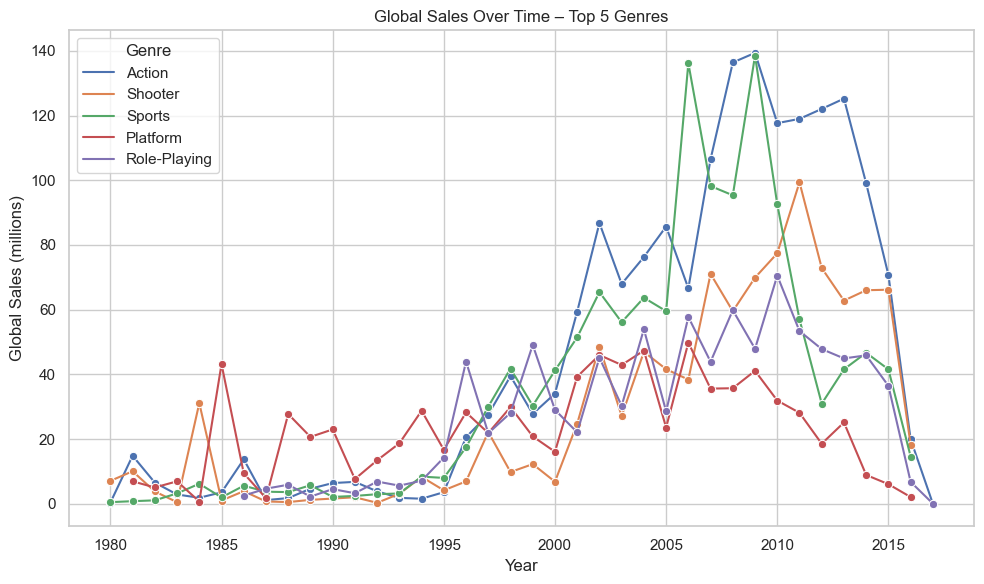

In [72]:
top_genres = genre_sales.head(5)["Genre"]
df_top_genres = df_year[df_year["Genre"].isin(top_genres)]

genre_year_sales = (
    df_top_genres
    .groupby(["Year", "Genre"])["Global_Sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.lineplot(data=genre_year_sales, x="Year", y="Global_Sales", hue="Genre", marker="o")
plt.title("Global Sales Over Time – Top 5 Genres")
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

### Publisher vs total global sales (Top 10 already plotted; here's a scatter)

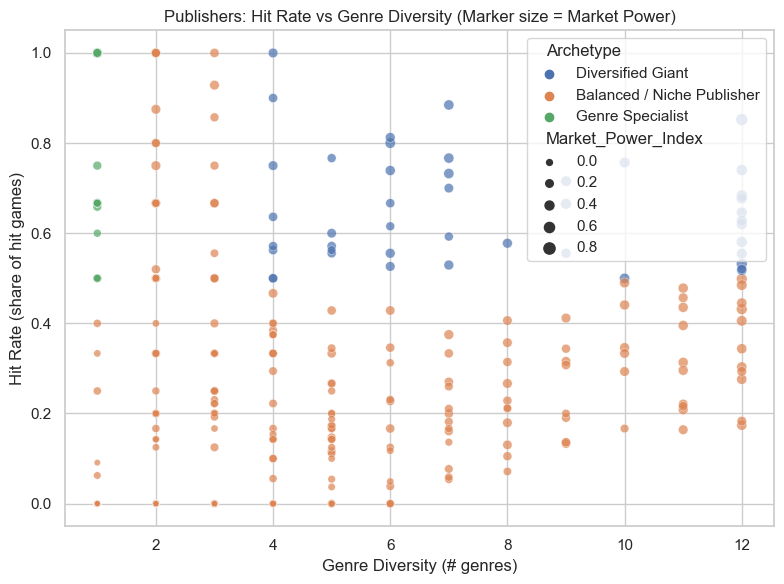

In [73]:

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=publisher_ranked,
    x="Genre_Diversity",
    y="Hit_Rate",
    size="Market_Power_Index",
    hue="Archetype",
    alpha=0.7
)
plt.title("Publishers: Hit Rate vs Genre Diversity (Marker size = Market Power)")
plt.xlabel("Genre Diversity (# genres)")
plt.ylabel("Hit Rate (share of hit games)")
plt.tight_layout()
plt.show()

## Short Textual Summary

Summary of Key Insights:

1. Overall Market Trends
   - The number of game releases rises sharply in the early 2000s and then stabilizes.
   - Global sales peak around the mid- to late-2000s, suggesting a golden era for console games.

2. Genre & Platform Insights
   - Action, Sports, and Shooter dominate in both number of titles and total sales.
   - Certain genres (e.g., Role-Playing, Fighting) are relatively niche but strongly over-index in Japan.
   - A small number of platforms (e.g., PS2, DS, Wii) account for a large share of global sales.

3. Regional Preferences
   - North America and Europe together drive the majority of global sales.
   - Japan has distinct preferences, especially for Role-Playing games.
   - Regional divergence scores highlight games that are big hits in one region but not others.

4. Publisher Market Power
   - A handful of publishers emerge as 'Diversified Giants' with high genre diversity, strong hit rates,
     and relatively stable regional sales.
   - 'Genre Specialists' have fewer genres but very high hit rates and strong leadership in specific niches.

5. Cultural Specificity
   - Cultural outlier games are those where more than half of sales come from a single region and
     other regions contribute less than 10% each. These games are strongly tied to local tastes.